# Analisis de datos del Titanic

### 1. Cargando los datos

In [7]:
# importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Lectura de los datos
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [9]:
# mostrar los primeros datos del dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Explorando los datos

In [10]:
# columnas en el dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# tamaño del dataset
train.shape

(891, 12)

In [12]:
# Hay valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Faltan datos en las columnas Age, Cabin y Embarked

In [13]:
# distribucion de las variables numericas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# comportamiento de las variables categoricas
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Segun la tabla anterior, habian mas hombres que mujeres en el titanic y la clase en la que mas se embarcaron es de tipo S

### 2.1 EDA: Estudio de la variable target

nos interesa saber como se comportó la variable sobreviviente con respecto a otras variables

In [15]:
# agrupar los Survived, contarlo y mostrar el resultado en la tabla PassengerId
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Sobrevivieron 342, 549 no sobrevivieron

In [16]:
#taget vs sex
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Murieron mas hombres (468) que mujeres (81) y sobrevivieron mas mujeres(233) que hombres(109)

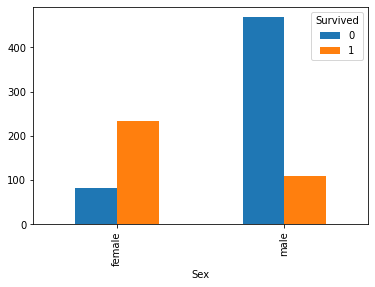

In [17]:
#grafica de sobrevivientes segun el sexo
grouped_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
grouped_sex.unstack(level=0).plot.bar()
plt.show()

In [18]:
# dar formato cuadriculado a los valores. Ayuda a la hora de realizar la grafica 
grouped_sex.unstack(level=0)

Survived,0,1
Sex,,
female,81,233
male,468,109


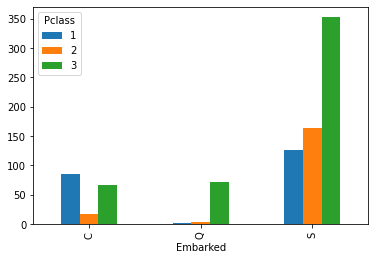

In [19]:
# investigar si existe relacion entre otras variables.
# Para este caso: embarked vs pclass
train.groupby(['Pclass', 'Embarked']).count()['PassengerId'].unstack(level=0).plot.bar()
plt.show()

### 3. Procesamiento de los datos

Seleccionamos las variables con la que vamos a trabajar
- Survived
- Sex
- Age
- Pclass

In [20]:
# tabla con las variables seleccionadas
train[['Survived','Sex','Age','Pclass']].head(5)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


In [21]:
# analizamos los datos nulos
train[['Survived','Sex','Age','Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Notamos que Sex es de tipo object lo cual puede representar un problema a la hora de hacer los modelos de ML. En caso de trabajar con la libreria SKLearn todos los datos deben ser de tipo numerico. Tenemos que mejorar:
- Datos faltantes en Age
- Cambiar el typo de variable de Sex a float o int

In [22]:
#distribucion de los datos nulos en Age
train[train['Age'].isna()].groupby(['Sex', 'Pclass']).count()['PassengerId'].unstack(level=0)

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


la tabla anterior indica que la mayoria de los hombres que viajan en tercera clase no registran su edad

In [23]:
train[train['Age'].isna()].groupby(['SibSp', 'Parch']).count()['PassengerId'].unstack(level=0)

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


Lo que indica la tabla anterior es que las personas que no registraron su edad iban viajando solas sin ningun familiar

In [24]:
# Calcular la mediana de la Age para imputar
train['Age'].median()

28.0

A jucicio propio, la edad de 28 es correspondiente a hombres que viajan en tercera clase solos. Por tanto, es un buen valor para imputar o rellenar los registros faltantes

In [25]:
# imputar valor para rellenar nulos
train['Age'] = train['Age'].fillna(28.0)
train[['Survived','Sex','Age','Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [26]:
# Cambiar valores y tipo de la variable Sex mediante un mapeo
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [27]:
# tabla ya procesada
train[['Survived','Sex','Age','Pclass']].head(5)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3


ya tenemos lista la tabla procesada

### 3.1 Crear nuevas variables

Vamos a crear una nueva variable asosiada a cuando una persona viaja sola de tipo flag. Flag son variables que solo pueden tomar dos valores depedendiendo si cumple una condicion dada: 0 y 1

In [28]:
# Crear nueva variable de tipo flag 'solo'
train['FlagSolo'] = np.where((train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


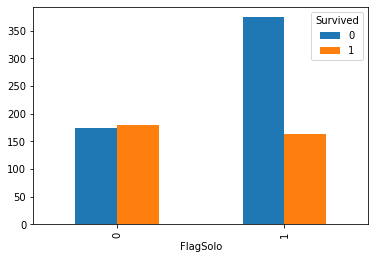

In [29]:
# crear una grafica de los que viajan solo en funcion de los sobrevivientes
grouped_flag = train.groupby(['Survived', 'FlagSolo']).count()['PassengerId']
print(grouped_flag)

grouped_flag.unstack(level=0).plot.bar()
plt.show()

La grafica anterio sugiere que los hombres que viajan solos tienden a no sobrevivir

In [30]:
train[['Survived','Sex','Age','Pclass','FlagSolo']].head(5)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1
3,1,1,35.0,1,0
4,0,0,35.0,3,1


De esta manera queda ya preparados los datos con lo que vamos hacer el modelo. Ahora vamos a crear las variables del modelo

In [31]:
# variable dependiente
Y_train = train['Survived']

# preprocesamiento de las variables independientes
features = ['Sex','Age','Pclass','FlagSolo']
X_train = train[features]

### 4 Modelos

Tomemos dos ejemplos de prueba:
- Regresion Logistica
- Arboles de Decision

In [34]:
# importamos la libreria de maching learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [33]:
# entrenando el modelo de regresion logistic
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [35]:
# entrenando el modelo de arboles de decision
decision_Tree = DecisionTreeClassifier()
decision_Tree.fit(X_train, Y_train)

DecisionTreeClassifier()

### 5 Evaluacion

Creamos una matriz de confusion y evaluamos que tan bueno es cada modelo. nos da una primera aproximacion del error en el modelo. Es una tabla que compara los valores predichos con los valores reales y deduce que tan confiables son los valores del modelo

In [42]:
from sklearn.metrics import plot_confusion_matrix

#funcion que creara la matriz de confusion con los datos del modelo
#creara las tablas y las graficara
def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo, X_train, Y_train,
                                cmap=plt.cm.Blues, values_format='d')

    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy,2))
    plt.show()

accuracy:  0.79


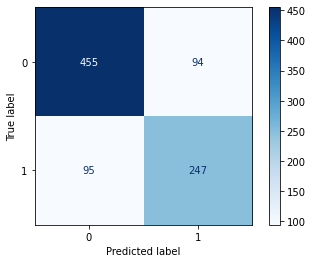

In [43]:
#regresion logistica
conf_mat_acc(logreg)

Nos de una presicion de 0,79. De los datos reales, 455 de los datos los ha predicho correctamente el modelo es decir, 455 personas no sobreviven. Mientras que de los que sobrevivieron, 247 fueron predichos correctamente por el modelo